In [1]:
import h5py
import itertools
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from neuropacks import ECOG
%matplotlib inline

In [2]:
data_path = '/Users/psachdeva/data/ECoG/data/r32_b7.mat'
grid_path = '/Users/psachdeva/data/ECoG/data/grdid.mat'
fits_path = 'fits/ecog/ecog_HG.h5'

In [3]:
ecog = ECOG(data_path=data_path, grid_path=grid_path)
fits = h5py.File(fits_path, 'r')

In [4]:
coupling_coefs_copy = np.median(fits['UoI_Lasso_AIC/coupling_coefs'][:], axis=0)
coupling_coefs = np.zeros((ecog.n_electrodes, ecog.n_electrodes))
for electrode in range(ecog.n_electrodes):
    coupling_coefs[electrode] = np.insert(coupling_coefs_copy[electrode], electrode, 0) 

In [6]:
G = nx.Graph()

In [7]:
# add nodes
positions = {}
for electrode in range(ecog.n_electrodes):
    G.add_node(electrode)
    x, y = ecog.get_xy_for_electrode(electrode)
    positions[electrode] = (y, -x)

In [8]:
weights = {}
for electrode_pair in itertools.combinations(np.arange(ecog.n_electrodes), 2):
    e1, e2 = electrode_pair
    weight = 0.5 * (coupling_coefs[e1, e2] + coupling_coefs[e2, e1])
    if weight != 0:
        weights[electrode_pair] = weight
        G.add_weighted_edges_from([(e1, e2, weight)])


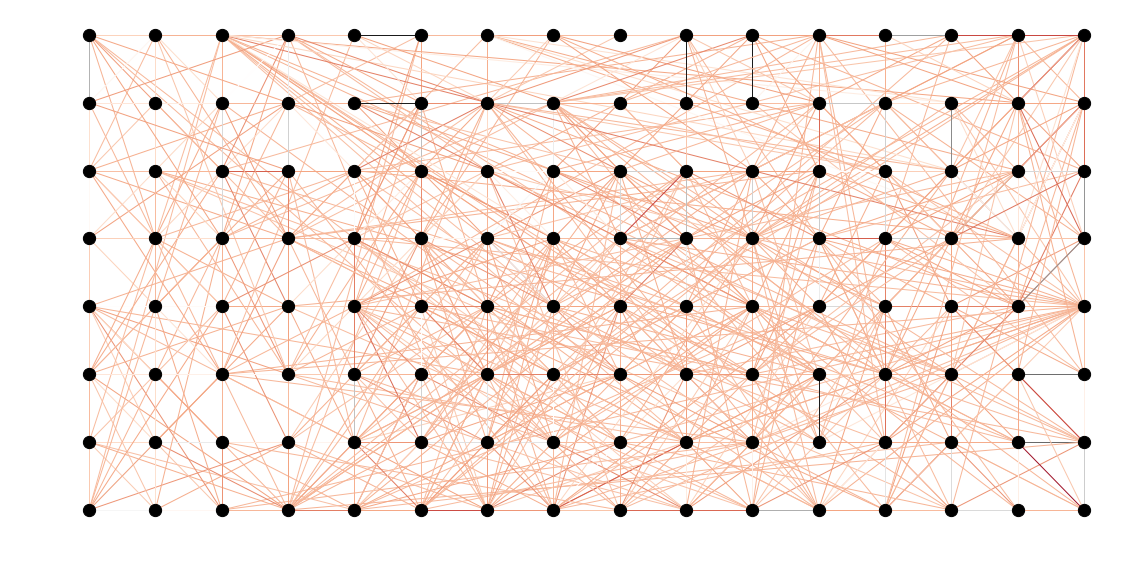

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
nx.draw_networkx_nodes(
    G=G,
    pos=positions,
    node_size=150,
    node_color='k',
    ax=ax
)
nx.draw_networkx_edges(
    G=G,
    pos=positions,
    #width=5*np.abs(list(weights.values())),
    edge_color=list(weights.values()),
    edge_cmap=plt.get_cmap('RdGy'),
    edge_vmin=-0.5,
    edge_vmax=1
)
#ax.set_xlim([-0.2, 15.2])
#ax.set_ylim([0.2, -7.2])
ax.axis('off')
plt.tight_layout()
plt.savefig('ecog_coupling_grid.pdf', bbox_inches='tight')
plt.show()

(array([  6.,  61., 674., 171.,  68.,  55.,  42.,  12.,   4.,   6.]),
 array([-0.38652581, -0.24789941, -0.109273  ,  0.0293534 ,  0.16797981,
         0.30660622,  0.44523262,  0.58385903,  0.72248543,  0.86111184,
         0.99973825]),
 <a list of 10 Patch objects>)

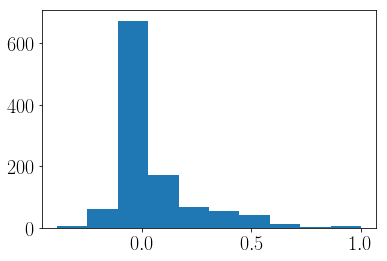

In [90]:
plt.hist(list(weights.values()))